In [28]:
import DataReader
import collections
import matplotlib.pyplot as plt
import numpy as np
import datetime
import sys
import pandas as pd

In [91]:
datareader = DataReader.CSVReader('data/app_331.csv', 'data/opp_331.csv')
basic_df = datareader.getBasicDataFrame()

Applied:  52187
Interview:  2579
Offered:  1510
unique_opp_count:  1773


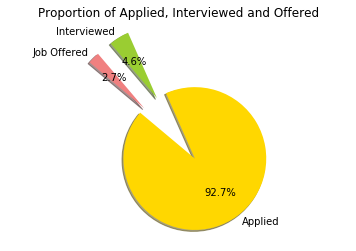

In [92]:
def displayAppStatePiechart(df):
# #     print(len(df['opp_id'].unique()))
#     groupby_opp = df.groupby('opp_id')['candidate_id'].agg('count')
# #     print(len(groupby_opp))
# #     print(len(groupby_opp[groupby_opp>500]))
# #     print(len(groupby_opp[groupby_opp<=500]))
    
#     size_0 = len(groupby_opp[groupby_opp==0])
#     print('Number of Opporunity without any application: %d' % size_0)
#     size_01_05 = len(groupby_opp[groupby_opp<=5])
#     size_06_25 = len(groupby_opp[groupby_opp<=25]) - size_01_05
#     size_26_50 = len(groupby_opp[groupby_opp<=50]) - len(groupby_opp[groupby_opp<=25])
#     size_51_100 = len(groupby_opp[groupby_opp<=100]) - len(groupby_opp[groupby_opp<=50])
#     size_100 = len(groupby_opp[groupby_opp>100])
    
    count_dict = collections.Counter(df['app_state'])
    applied = count_dict[1]
    interview = count_dict[2]
    offered = count_dict[3]
    
    unique_opp_count = len(basic_df['opp_id'].unique())
    print('Applied: ', applied)
    print('Interview: ', interview)
    print('Offered: ', offered)
    print('unique_opp_count: ', unique_opp_count)
    
    # Data to plot
    labels = 'Applied', 'Interviewed', 'Job Offered'
    sizes = [applied, interview, offered]
    colors = ['gold', 'yellowgreen', 'lightcoral']
    explode = (0, 1, 1)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Proportion of Applied, Interviewed and Offered')
    plt.axis('equal')
    plt.show()

displayAppStatePiechart(basic_df)

33837
37232
0.9088149978513107


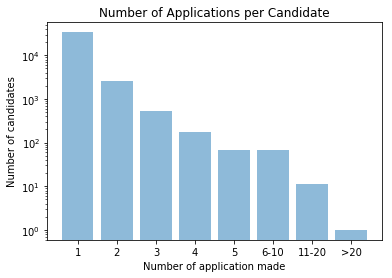

In [69]:
def displayCandidateAppHistogram_old_notused(df):
    appcount_dict = collections.defaultdict(int)
    for index, row in df.iterrows():
        appcount_dict[row['candidate_id']] += 1

    histo_dict = collections.defaultdict(int)
    for k, v in appcount_dict.items():
        histo_dict[v] += 1

    print(histo_dict)
    '''
    defaultdict(<class 'int'>, {1: 216391, 2: 11049, 3: 1920, 4: 582, 5: 245, 6: 107, 7: 91, 8: 61, 9: 29, 10: 23, 
    11: 12, 12: 13, 13: 10, 14: 7, 15: 3, 16: 1, 17: 1, 18: 4, 19: 2, 20: 1, 21: 2, 22: 1, 23: 1, 24: 1, 25: 1, 41: 1, 
    57: 1})
    '''

    # sudo apt-get install python3-tk
    plt.hist(list(histo_dict.values()), normed=True, bins=30)
    plt.ylabel('Probability')
    plt.show()

    
def displayCandidateAppHistogram2(df):
    applications = df.groupby('candidate_id')['opp_id'].agg('count')
    
    hist, bins = np.histogram(applications, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.yscale('log')
    plt.bar(center, hist, align='center', width=width)
    plt.show()
    

def displayCandidateAppPiechart(df):
#     print(len(df['candidate_id'].unique()))
    groupby_candidate = df.groupby('candidate_id')['opp_id'].agg('count')
#     print(len(groupby_opp))
#     print(len(groupby_opp[groupby_opp>500]))
#     print(len(groupby_opp[groupby_opp<=500]))
    
    size_01 = len(groupby_candidate[groupby_candidate==1])
    size_02 = len(groupby_candidate[groupby_candidate==2])
    size_03 = len(groupby_candidate[groupby_candidate==3])
    size_04 = len(groupby_candidate[groupby_candidate==4])
    size_05 = len(groupby_candidate[groupby_candidate==5])
    
    size_06_10 = len(groupby_candidate[groupby_candidate<=10]) - len(groupby_candidate[groupby_candidate<=5])
    size_11_20 = len(groupby_candidate[groupby_candidate<=20]) - len(groupby_candidate[groupby_candidate<=10])
    size_21 = len(groupby_candidate[groupby_candidate>20])
    
    print(size_01)
    print(size_01 + size_02 + size_03 + size_04 + size_05 + size_06_10 + size_11_20 + size_21)
    
    print((size_01)/(size_01 + size_02 + size_03 + size_04 + size_05 + size_06_10 + size_11_20 + size_21))
    
    objects = ('1', '2', '3', '4', '5', '6-10', '11-20', '>20')
    y_pos = np.arange(len(objects))
    performance = [size_01, size_02, size_03, size_04, size_05, size_06_10, size_11_20, size_21]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number of candidates')
    plt.xlabel('Number of application made')
    plt.title('Number of Applications per Candidate')
    plt.yscale('log')
    plt.show()
    
    
# displayCandidateAppHistogram2(basic_df)
displayCandidateAppPiechart(basic_df)

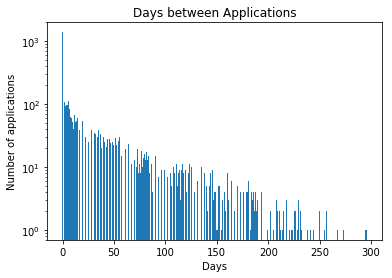

In [31]:
def displayCandidateTemporalStats(df):
    '''
    Compute the number of days between applications for a candidate
    :param df:
    :return:
    '''
    groupby_candidate = df.groupby('candidate_id')['create_date']

    timeDiff = []
    for k, v in groupby_candidate:
        if len(v) > 1:
            v = sorted(v)
            # print(v)
            for i in range(len(v)-1):
                try:
                    cur = datetime.datetime.strptime(v[i], "%Y-%m-%d %H:%M:%S")
                    nex = datetime.datetime.strptime(v[i+1], "%Y-%m-%d %H:%M:%S")
                    diff = nex - cur
                    # print(type(diff))
                    # print(diff.days)
                    timeDiff.append(diff.days)

                except:
                    print("Unexpected error:", sys.exc_info()[0])

#     print(len(timeDiff))
#     print(timeDiff[:20])

    hist, bins = np.histogram(timeDiff, bins=500)
    
#     width = 0.7 * (bins[1] - bins[0])
#     center = (bins[:-1] + bins[1:]) / 2
#     plt.bar(center, hist, align='center', width=width)
    width = bins[1] - bins[0]
    plt.bar(bins[:-1], hist, width=width)
    plt.title('Days between Applications')
    plt.xlabel('Days')
    plt.ylabel('Number of applications')
    plt.yscale('log')
    plt.show()

displayCandidateTemporalStats(basic_df)

Number of Opporunity without any application: 0


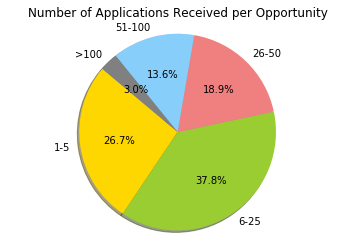

In [32]:
def displayOpportunityPopularityHistogram(df):
    groupby_opp = df.groupby('opp_id')['candidate_id'].agg('count')
    
#     print(groupby_opp)
    hist, bins = np.histogram(groupby_opp, bins=500)
    
#     width = 0.7 * (bins[1] - bins[0])
#     center = (bins[:-1] + bins[1:]) / 2
#     plt.bar(center, hist, align='center', width=width)
    
    width = 1.0 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    
    plt.yscale('log')
    plt.show()
    # 500 opp has 10 candidates applying
    
def displayOpportunityPopularityPiechart(df):
#     print(len(df['opp_id'].unique()))
    groupby_opp = df.groupby('opp_id')['candidate_id'].agg('count')
#     print(len(groupby_opp))
#     print(len(groupby_opp[groupby_opp>500]))
#     print(len(groupby_opp[groupby_opp<=500]))
    
    size_0 = len(groupby_opp[groupby_opp==0])
    print('Number of Opporunity without any application: %d' % size_0)
    size_01_05 = len(groupby_opp[groupby_opp<=5])
    size_06_25 = len(groupby_opp[groupby_opp<=25]) - size_01_05
    size_26_50 = len(groupby_opp[groupby_opp<=50]) - len(groupby_opp[groupby_opp<=25])
    size_51_100 = len(groupby_opp[groupby_opp<=100]) - len(groupby_opp[groupby_opp<=50])
    size_100 = len(groupby_opp[groupby_opp>100])
    
#     print(size_01_05 + size_06_25 + size_26_50 + size_51_100 + size_100)
    
    # Data to plot
    labels = '1-5', '6-25', '26-50', '51-100', '>100'
    sizes = [size_01_05, size_06_25, size_26_50, size_51_100, size_100]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'grey']
    explode = (0, 0, 0, 0, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Number of Applications Received per Opportunity')
    plt.axis('equal')
    plt.show()

    
displayOpportunityPopularityPiechart(basic_df)
# displayOpportunityPopularityHistogram(basic_df)

In [33]:
# Check for candidate that makes multiple application to the same opportunity

groupby_opp = basic_df.groupby(['candidate_id', 'opp_id'])['opp_id'].count()

print(groupby_opp[groupby_opp>=2])
# groupby_opp[groupby_opp>=2].to_csv('tmp.csv')

# basic_df[basic_df['candidate_id']==41.0]

Series([], Name: opp_id, dtype: int64)


In [34]:
# Total number of unique app and opp id dont match
def checkApplication(app_csv_filename, id_csv_filename, cv_csv_filename):
    id_df = pd.read_csv(id_csv_filename)
    app_df = pd.read_csv(app_csv_filename)
    cv_df = pd.read_csv(cv_csv_filename)
    # print(id_df.head(1))
    print('Unique app_id in %s: %d' %(app_csv_filename, len(app_df['app_id'].unique())))
    print('Unique app_id in %s: %d' % (id_csv_filename, len(id_df['app_id'].unique())))
    print('Unique opp_id in %s: %d' % (app_csv_filename, len(app_df['opp_id'].unique())))
    print('Unique opp_id in %s: %d' % (id_csv_filename, len(id_df['opp_id'].unique())))
#     print('Unique candidate_id in %s: %d' % (app_csv_filename, len(app_df['candidate_id'].unique())))
#     print('Unique candidate_id in %s: %d' % (id_csv_filename, len(id_df['candidate_id'].unique())))

checkApplication('data/app_200.csv', '/backup/vX/apps_opps/rep/report_200_live.csv', '/backup/vX/CV/200/files_200.csv')

Unique app_id in data/app_200.csv: 142600
Unique app_id in /backup/vX/apps_opps/rep/report_200_live.csv: 339718
Unique opp_id in data/app_200.csv: 5686
Unique opp_id in /backup/vX/apps_opps/rep/report_200_live.csv: 7466


In [35]:
# Check for candidate with potential multiple account
# groupby_email = basic_df.groupby(['email', 'first_name', 'last_name'])['candidate_id'].apply(lambda x: len(x.unique()))
groupby_email = basic_df.groupby([basic_df['first_name'].str.lower(), 
                                  basic_df['last_name'].str.lower(), 
                                  basic_df['email'].str.lower()])['candidate_id'].apply(lambda x: len(x.unique()))

print(groupby_email[groupby_email>=2])

# index = groupby_email.index

# basic_df[basic_df['email']=='harris_y@hotmail.co.uk'][['app_id', 'opp_id', 'candidate_id', 'first_name', 'last_name', 'email', 'phone', 'submitted_date']]

Series([], Name: candidate_id, dtype: int64)
